# #1 dimensions vs metrics

There are two kind of fields:
- dimensions (country, banner_id, campaign_name ..)
- metrics: (clicks, spends, impressions …)

We need an estimation for a question: what part of the fields are metrics? It is not always easy to say exactly if this field metric is neither dimension. Ok to have answer like: from 25% to 35%

round answer to integer

In [1]:
import pandas as pd

df = pd.read_csv("Data_Dictionary_for_CSV_2022_10_06.csv")

df.head()

,data_source_title,report_type_title,field_title,sql_field_name,api_field_name
0,ACME,Transactions,Sale Channel,sale_channel,SaleChannel
1,ACME,Transactions,Purchase Type,purchase_type,PurchaseType
2,ACME,Transactions,Payment Status,payment_status,PaymentStatus
3,ACME,Transactions,Payment Method,payment_method,PaymentMethod
4,ACME,Transactions,Payment Due Date,payment_due_date,PaymentDueDate


In [3]:
df.shape[0]

31076

In [8]:
df_lower = df.apply(lambda x: x.astype(str).str.lower())

In [157]:
df_lower.head()

,data_source_title,report_type_title,field_title,sql_field_name,api_field_name
0,acme,transactions,sale channel,sale_channel,salechannel
1,acme,transactions,purchase type,purchase_type,purchasetype
2,acme,transactions,payment status,payment_status,paymentstatus
3,acme,transactions,payment method,payment_method,paymentmethod
4,acme,transactions,payment due date,payment_due_date,paymentduedate


In [146]:
df_lower[
    df_lower["sql_field_name"].str.contains(
        "channel|type|status|method|date|sentiment|url|id|num|name|code|city|time|last|subject|dayofweek|dayofmonth|data|os|origin|title|link|when|browser|ip|detail|utc|currency|weekday|system|source|region|country|domain|platform|group|campaign|token|language|color|carrier|dma|java|latlon|category|engine|company|rank|service|state|server|agent|hash|keyword|tactic|usd|policy|brand|condition|local|version|key|format|area"
    )
]

,data_source_title,report_type_title,field_title,sql_field_name,api_field_name
0,acme,transactions,sale channel,sale_channel,salechannel
1,acme,transactions,purchase type,purchase_type,purchasetype
2,acme,transactions,payment status,payment_status,paymentstatus
3,acme,transactions,payment method,payment_method,paymentmethod
4,acme,transactions,payment due date,payment_due_date,paymentduedate
...,...,...,...,...,...
31061,zignal labs,newsroom stories,source,source,source
31062,zignal labs,newsroom stories,title,title,title
31068,zignal labs,key metrics,positive,positive,sentiment.sentiment.positive
31074,zignal labs,newsroom stories,url,url,url


In [147]:
temp_df = df_lower[
    ~df_lower["sql_field_name"].str.contains(
        "channel|type|status|method|date|sentiment|url|id|num|name|code|city|time|last|subject|dayofweek|dayofmonth|data|os|origin|title|link|when|browser|ip|detail|utc|currency|weekday|system|source|region|country|domain|platform|group|campaign|token|language|color|carrier|dma|java|latlon|category|engine|company|rank|service|state|server|agent|hash|keyword|tactic|usd|policy|brand|condition|local|version|key|format|area"
    )
]

In [148]:
temp_df

,data_source_title,report_type_title,field_title,sql_field_name,api_field_name
14,acme,transactions,add on,add_on,addon
18,acme,transactions,transaction amount,transaction_amount,transactionamount
19,acme,transactions,quantity,quantity,quantity
20,acme,transactions,payment amount,payment_amount,paymentamount
21,acme,transactions,order balance,order_balance,orderbalance
...,...,...,...,...,...
31069,zignal labs,key metrics,impressions news blogs,impressions_news_blogs,:calc.impressions_news_blogs
31070,zignal labs,key metrics,social,social,:calc.social
31071,zignal labs,key metrics,news blogs,news_blogs,:calc.news_blogs
31072,zignal labs,key metrics,total mentions,total_mentions,mentions.count


Suggestion for correction on the website: 'ip_address' instead of 'ip_adress'
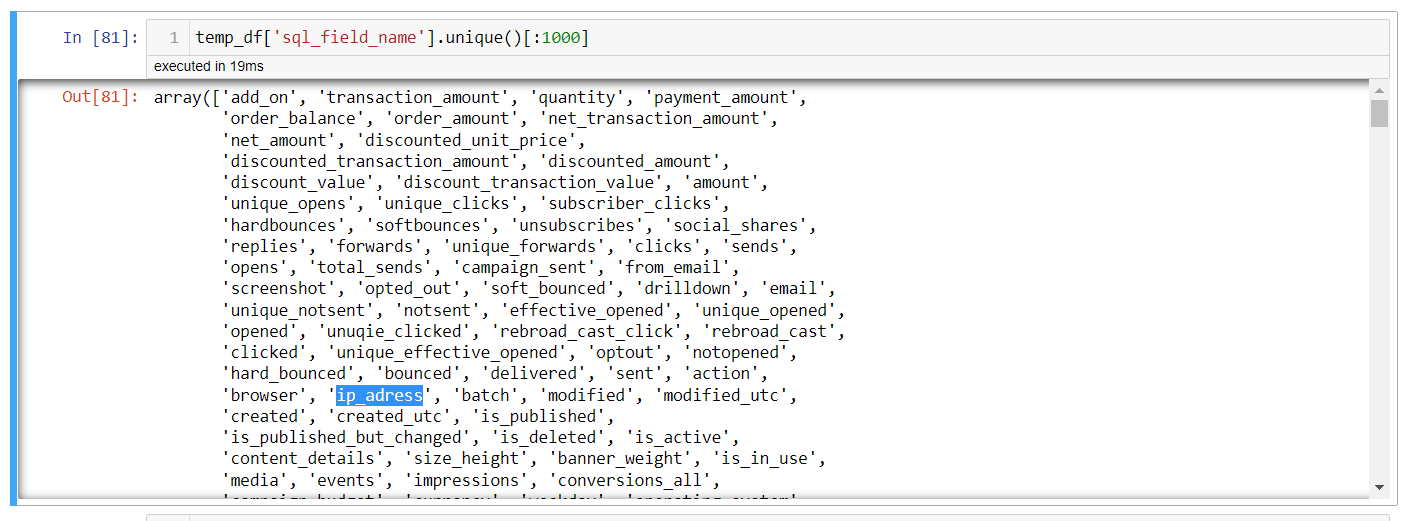

In [156]:
metrics = temp_df.shape[0]
total = df.shape[0]
percent = metrics/total
percent

0.4794053288711546